## If you are new to Python

- I will include detailed comments in this demo describing what the code does.
- If you want a more in depth guide to using Python for data analysis and data science, check out the Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/

In [1]:
#required imports for the demo

#this is the standard notation for importing 3rd party modules in Python

import numpy as np # numpy is a versatile matrix manipulation library
import pandas as pd # pandas allows you to create and manipulate data frames
import matplotlib.pyplot as plt # matplotlib is your main plotting library, inspired by MATLAB
import seaborn as sns # a library built on top of matplotlib which allows for more customization

## Required dependencies
 - Before using the EphysToolkit module, you first need to make sure you have the following dependencies installed:
 
     - numpy
     - scipy
     - pandas
     - json

## "Installing" the module
 - First, download the EphysToolkit.py file to any folder.
 - Then, define a variable pointing to the directory where you placed the file.

In [2]:
# you can change this variable to point to your directory instead
EphysToolkit_path = "/media/sf_DebianShared/custom_modules"

- Copy and run the following lines of code to append the directory to your project path:

In [3]:
# these lines import the the sys module & add the module path to the project path
import sys
sys.path.append(EphysToolkit_path)

- Finally, run these import statements:

In [4]:
from EphysToolkit import ephys_toolkit
from EphysToolkit import load_experiment

## Loading an experiment

 - The following section describes how to load your data using the load_experiment class.
 - First, define some variables pointing to your file paths.
 - Use absolute paths.
 - Spike times are located in a file that ends with 'firings.mat'.
 - Stimulus data are located in a file that ends with 'stimulusData.mat'.

In [5]:
#you can change these variables to point to your file paths instead
spike_file = '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK1/AE_M001_Section_1_BLK1_firings.mat'
stim_file =  '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK1/AE_M001_Section_1_BLK1_stimulusData.mat'

In [6]:
# defines a variable pointing to an instance of the load_experiment class

# If you are coming from MATLAB, which is a functional programming language 
# and are not familiar with object oriented programming languages like Python
# a class is a way to organize code which allows for self referencing
# and creating instances/objects - units of code that have the functionality
# of all the code organized in the class.

# This statement intializes an instance of the load_experiment class
# throughout the demo, we will be calling on different functionalities 
# of this class instance.
experiment = load_experiment(spike_file, stim_file)

## Checking the stimulus data
 - Stimulus information is retrieved by calling the stim_data attribute
 - Stimulus data is stored in a pandas dataframe because all arrays have the same length.

In [7]:
# Here, we call an attribute of the load_experiment class
# attributes are analagous to variables, but only hold
# data associated with the project.

# This attribute holds a Pandas dataframe of the stim data.
# This demo will include comments describing the dataframe
# operations performed here. However, pandas is an extremely
# powerful library with many versitile functionalities.
# Pandas will probably be your #1 used tool for data table
# manipulation in Python, so I highly reccomend you check
# out more of its functionality. The Python Data Science
# Handbook is a great place to start. 
experiment.stim_data

,stim_condition_ids,stim_start_indicies,stim_stop_indicies,stim_start_times,stim_stop_times
0,1,40906,51509,2045.30,2575.45
1,2,51837,62501,2591.85,3125.05
2,1,62838,73504,3141.90,3675.20
3,2,73841,84504,3692.05,4225.20
4,1,84899,95497,4244.95,4774.85
...,...,...,...,...,...
393,2,4337436,4347770,216871.80,217388.50
394,1,4348105,4358769,217405.25,217938.45
395,2,4359104,4369763,217955.20,218488.15
396,1,4370099,4380762,218504.95,219038.10


In [8]:
# You can easily load this attribute into a new variable, 
# if you want it to be separate from the class instance.

data_frame = experiment.stim_data

## Checking the spiking data
 - Cluster spiking information is retrieved by calling the spike_data attribute.
 - Spiking data is stored as a list of dictionaries.
 - Each dictionary corresponds to a different cluster.
 - The dictionary keys are:
     - 'cluster_id': a number corresponding to the unique id of the cluster
     - 'channel_id': a number corresponding to the channel that picked up the cluster
     - 'spike_index': index of spikes relative to the length of the entire recording
     - 'spike_time': time that a spike occured in unix time
     - 'rel_spike_time': time of the spike in ms relative to the start of the recording

In [9]:
# This is what the spike_data attribute looks like.
# The main data structure is a list that can be indexed
# with [] square brackets.

# Python is a 0 indexing language, so to get the first
# element in the list, index with 0
experiment.spike_data[0]

{'cluster_id': 1,
 'channel_id': 1,
 'spike_index': array([  14524,   18341,   22224,   22452,   47032,   50160,   55423,
          56467,   59183,   87399,   88436,   88528,   92455,   93140,
         110785,  132513,  143412,  144932,  146016,  147232,  160744,
         165017,  184095,  188244,  198004,  208396,  210008,  213864,
         216216,  217080,  218944,  219656,  223196,  242468,  247872,
         248116,  253779,  255615,  260600,  261016,  263367,  264680,
         276208,  278860,  284212,  309875,  311968,  318499,  322308,
         333105,  334748,  340880,  351183,  354853,  356840,  359832,
         360024,  361239,  363634,  364025,  366160,  366260,  369431,
         389272,  390535,  402846,  403240,  418835,  420940,  423627,
         423753,  429923,  440786,  442427,  446061,  458420,  494755,
         499116,  505925,  509487,  511350,  511708,  514653,  520983,
         521035,  522410,  526460,  542904,  546096,  556164,  563656,
         580598,  582088, 

In [10]:
# Each element in the list is a dictionary.
# Dictionaries are data structures that allow you to access
# your data with a paired key. To check the relative spike 
# times to the start of the recording, use the 
# 'rel_spike_time' key between square brackets.

experiment.spike_data[0]['rel_spike_time']

array([   726.2 ,    917.05,   1111.2 ,   1122.6 ,   2351.6 ,   2508.  ,
         2771.15,   2823.35,   2959.15,   4369.95,   4421.8 ,   4426.4 ,
         4622.75,   4657.  ,   5539.25,   6625.65,   7170.6 ,   7246.6 ,
         7300.8 ,   7361.6 ,   8037.2 ,   8250.85,   9204.75,   9412.2 ,
         9900.2 ,  10419.8 ,  10500.4 ,  10693.2 ,  10810.8 ,  10854.  ,
        10947.2 ,  10982.8 ,  11159.8 ,  12123.4 ,  12393.6 ,  12405.8 ,
        12688.95,  12780.75,  13030.  ,  13050.8 ,  13168.35,  13234.  ,
        13810.4 ,  13943.  ,  14210.6 ,  15493.75,  15598.4 ,  15924.95,
        16115.4 ,  16655.25,  16737.4 ,  17044.  ,  17559.15,  17742.65,
        17842.  ,  17991.6 ,  18001.2 ,  18061.95,  18181.7 ,  18201.25,
        18308.  ,  18313.  ,  18471.55,  19463.6 ,  19526.75,  20142.3 ,
        20162.  ,  20941.75,  21047.  ,  21181.35,  21187.65,  21496.15,
        22039.3 ,  22121.35,  22303.05,  22921.  ,  24737.75,  24955.8 ,
        25296.25,  25474.35,  25567.5 ,  25585.4 , 

In [11]:
# You can use slice indexing to retrieve parts of the data.
# This returns the first 10 spike times.
# Because Python is 0 indexed, itexcludes the last index in
# This slice, essentially giving you index 0-9.

experiment.spike_data[0]['rel_spike_time'][:10]

array([ 726.2 ,  917.05, 1111.2 , 1122.6 , 2351.6 , 2508.  , 2771.15,
       2823.35, 2959.15, 4369.95])

## Changing the units of your event times
 - This section describes how to change the time unit for your event times using the get_event_times method.
 - By default, EphysToolkit gives you your event times (stim start, stim stop, rel spike time) in milliseconds. It should not be necessary to change the unit of your event times, but it is possible.
 - You should always give your units in terms of 1 second, ie:
     - 1ms = 0.001
     - 1cs = 0.01
     - 1ds = 0.1
     - 1s  = 1
 - It is also possible to define any arbitrary unit as long as it is relative to 1 second.
 - List of arguments that can be passed to the get_event_times method:
     - bin_size: default value argument set to 0.001

In [12]:
# get_event_times is a class method, methods are analagous to functions,
# but are functions associated with the class.

# include the argument between () circular brackets
experiment.get_event_times(bin_size = 0.001) #event times in milliseconds
experiment.get_event_times(bin_size = 0.01) #event times in centiseconds
experiment.get_event_times(bin_size = 0.1) #event times in deciseconds
experiment.get_event_times(bin_size = 1) #event times in seconds

 - Checking the changes...

In [13]:
#The last line of code changed the unit to seconds, so event times are given in seconds
experiment.stim_data

,stim_condition_ids,stim_start_indicies,stim_stop_indicies,stim_start_times,stim_stop_times
0,1,40906,51509,2.04530,2.57545
1,2,51837,62501,2.59185,3.12505
2,1,62838,73504,3.14190,3.67520
3,2,73841,84504,3.69205,4.22520
4,1,84899,95497,4.24495,4.77485
...,...,...,...,...,...
393,2,4337436,4347770,216.87180,217.38850
394,1,4348105,4358769,217.40525,217.93845
395,2,4359104,4369763,217.95520,218.48815
396,1,4370099,4380762,218.50495,219.03810


In [14]:
experiment.spike_data[0]['rel_spike_time'][:10]

array([0.7262 , 0.91705, 1.1112 , 1.1226 , 2.3516 , 2.508  , 2.77115,
       2.82335, 2.95915, 4.36995])

 - As stated previously, it is possible to define any arbitrary unit as long as it is relative to 1 second.
 - Let's try defining a 1 quarter second unit

In [15]:
experiment.get_event_times(bin_size = 0.25) #event times in quarter seconds
experiment.spike_data[0]['rel_spike_time'][:10]

array([ 2.9048,  3.6682,  4.4448,  4.4904,  9.4064, 10.032 , 11.0846,
       11.2934, 11.8366, 17.4798])

In [16]:
# Resetting the units to 1ms.
# Since the bin_size argument is a default value argument set to 0.001
# it does not need to be passed to reset to 1ms.
experiment.get_event_times()

## Checking the spike sorting metrics
 - This section describes how to retrieve your spike sorting metrics using the get_spike_sorting_metrics method.
 - First, define a variable pointing to the path of your spike sorting metrics file.
 - The metrics file typically ends with 'metrics_isolation.json'.
 - List of arguments that can be passed to the get_spike_sorting_metrics method:
     - Metrics file: a string of the absolute path to the metrics file or a variable pointing to a string of the absolute path.


In [17]:
#you can change this variable to point to your file path instead
metrics_file = '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_metrics_isolation.json'

In [18]:
metrics = experiment.get_spike_sorting_metrics(metrics_file)
metrics

,cluster,isolation,noise_overlap
0,1.0,0.997650,0.240012
1,2.0,0.997487,0.007540
2,3.0,0.910693,0.205053
3,4.0,0.878966,0.188308
4,5.0,0.898355,0.206228
...,...,...,...
452,453.0,0.908343,0.133666
453,454.0,0.903349,0.178613
454,455.0,0.890717,0.172738
455,456.0,0.905993,0.172150


(0.0, 0.5)

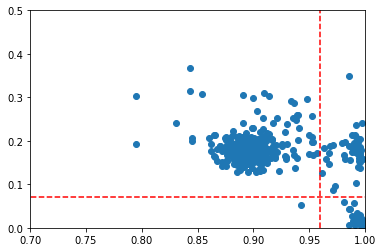

In [19]:
#plot isolation x noise overlap

# plt refers to pyplot, a class taken from the main plotting library 
# that is used in this guide: Matplotlib. This module is inspired 
# by the plotting modules used in MATLAB, so some of this may look
# familiar. This demo will describe the matplotlib operations
# utilized, but just like with Pandas, I highly reccommend 
# learning more about matplotlib if you are new to Python.

# plot isolation on x axis and noise overlap on y axis with a scatterplot
plt.scatter(metrics['isolation'], metrics['noise_overlap'])

# draw a horizontal red dashed line at y = 0.07

# np.linspace(0,1,457) makes an array of 457 linearly spaced x values 
# between 0 and 1.

# [0.07]*457 makes a list of 457 y values which are all 0.07.
plt.plot(np.linspace(0,1,457),[0.07]*457, linestyle = '--', color = 'red')

# same as above, but with a vertical line at x = 0.96
plt.plot([0.96]*457, np.linspace(0,1,457), linestyle = '--', color = 'red')

# define the axis limits
plt.xlim(0.7,1)
plt.ylim(0,0.5)

- Below demonstrates how to make a list of units that pass the single unit criteria (isolation > 0.96, noise overlap < 0.07):

In [20]:
# Below is an example of line spaced indexing.
# It's just like normal indexing but saves horizontal space.

# Using the loc method from the pandas module.
# loc is a method that allows for boolean selection of dataframe rows.

single_units = metrics.loc[ 
    
    (metrics.isolation > 0.96) 
    & (metrics.noise_overlap < 0.07)
    
].reset_index()

# Reset index creates a new index for the dataframe from 0 - N.

In [21]:
single_units

,index,cluster,isolation,noise_overlap
0,1,2.0,0.997487,0.007540
1,29,30.0,0.998825,0.004113
2,30,31.0,0.997650,0.006463
3,34,35.0,0.997356,0.019683
4,35,36.0,0.997356,0.009988
5,36,37.0,1.000000,0.005288
6,38,39.0,0.997944,0.009694
7,39,40.0,0.999412,0.000294
8,40,41.0,0.990012,0.057873
9,47,48.0,0.996769,0.010576


In [22]:
# index into the 'index' column of the dataframe
# call the values method from the pandas module to 
# convert the series object into an array
include_units = single_units['index'].values

In [23]:
include_units

array([  1,  29,  30,  34,  35,  36,  38,  39,  40,  47,  48,  52,  87,
        89,  90,  91,  92, 112, 119, 120, 122, 127, 128, 151, 156, 166,
       198, 200, 234, 262, 263, 264])

## Making raster arrays and raster plots
 - This section describes how to make raster arrays using the make_raster method.
 - This method allows you to get an array of spike times centered around a particular set of event times as 0
 - First, define an array of stim start times and an array of spike times.

In [24]:
spiketimes = experiment.spike_data[40]['rel_spike_time']
stimtimes = experiment.stim_data['stim_start_times'].values

- By default, the make_raster method concatenates/sums all spikes across each stimulus repetition.

In [25]:
raster = experiment.make_raster(
    stimtimes, #first argument is the stimtimes
    spiketimes, #second argument is the spiketimes
    thresh = (-500,500) #third argument "thresh" defines the time boundaries around 0 as the stimulus onset
)

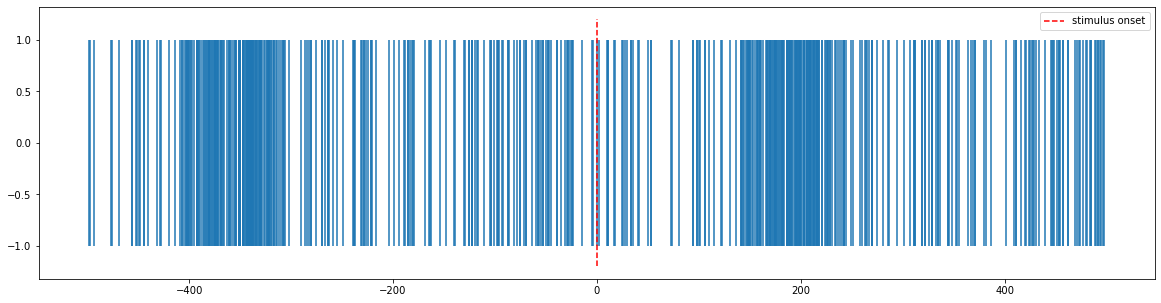

In [26]:
#plot your raster
plt.subplots(figsize = (20,5))
plt.vlines(raster, -1, 1)
plt.vlines(0,-1.2,1.2, linestyle = '--', color = 'red', label = "stimulus onset")
plt.legend()

- You can also make an individual raster array for each individual stimulus repetition by setting the "concatenate" argument equal to "False".

In [27]:
raster = experiment.make_raster(
    stimtimes,
    spiketimes,
    thresh = (-500,500),
    concatenate = False #make an individual raster for each stimulus rep
)

In [28]:
raster[0:5] #the raster array for each of the first 5 stimulus repetitions

[[114.54999999999995],
 [-432.0, 154.70000000000027, 439.5500000000002],
 [-395.3499999999999, -110.5],
 [],
 []]

In [29]:
print(f"This experiment repeated the stimulus {len(raster)} times") 

This experiment repeated the stimulus 398 times


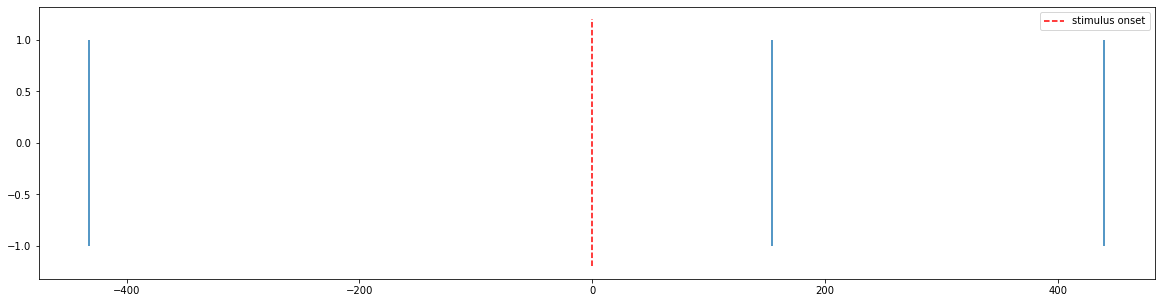

In [30]:
#a raster plot of the response to only the second repetition of the same stimulus

plt.subplots(figsize = (20,5))
plt.vlines(raster[1], -1, 1)
plt.vlines(0,-1.2,1.2, linestyle = '--', color = 'red', label = "stimulus onset")
plt.legend()

## Getting events associated with a particular stimulus condition
- The following section will describe how to get the event times associated with a particular stimulus condition using the get_condition_times method.
- In the previous example where I showed how to make a raster plot, the raster was made relative to all stimulus condition start times. 
- If you want to make a raster plot relative to a specific stimulus condition, you can use the start times associated with just that condition in the make_raster method.
- Let's demonstrate how to get those start times using get_condition_times.
- First, you must choose a condition whose times you want to retrieve. 
- You can browse all the condition identifiers associated with your experiment using the stim_conditions method.

In [31]:
experiment.stim_conditions

array([1, 2], dtype=uint8)

- Since this experiment used only a polarity switching checkerboard stimulus, the only conditions are 1 and 2.

In [32]:
condition_1_events = experiment.get_condition_times(1)
condition_1_events

{'start': array([  2045.3 ,   3141.9 ,   4244.95,   5341.9 ,   6441.85,   7541.8 ,
          8641.8 ,   9741.75,  10841.6 ,  11941.75,  13041.45,  14141.55,
         15241.7 ,  16341.7 ,  17441.65,  18541.65,  19641.45,  20724.95,
         21824.85,  22924.75,  24024.85,  25124.8 ,  26224.7 ,  27324.6 ,
         28424.95,  29508.35,  30591.6 ,  31691.4 ,  32791.5 ,  33891.35,
         34974.7 ,  36074.8 ,  37174.75,  38274.8 ,  39358.1 ,  40457.85,
         41557.7 ,  42641.3 ,  43724.75,  44824.35,  45924.35,  47008.  ,
         48091.2 ,  49190.95,  50274.6 ,  51374.55,  52474.3 ,  53557.9 ,
         54657.85,  55757.85,  56857.85,  57957.8 ,  59057.4 ,  60141.1 ,
         61241.  ,  62340.7 ,  63424.45,  64524.35,  65624.  ,  66724.3 ,
         67824.  ,  68907.45,  70007.2 ,  71090.9 ,  72173.85,  73257.5 ,
         74357.5 ,  75457.1 ,  76540.8 ,  77640.45,  78740.4 ,  79824.05,
         80923.8 ,  82007.  ,  83107.2 ,  84207.35,  85307.35,  86390.65,
         87490.35,  88573.55,

- You can now get the event times associated with condition 1 by indexing the dictionary that is returned.

In [33]:
stimtimes = condition_1_events['start']

In [34]:
raster = experiment.make_raster(
    stimtimes,
    spiketimes,
    thresh = (0,500),
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


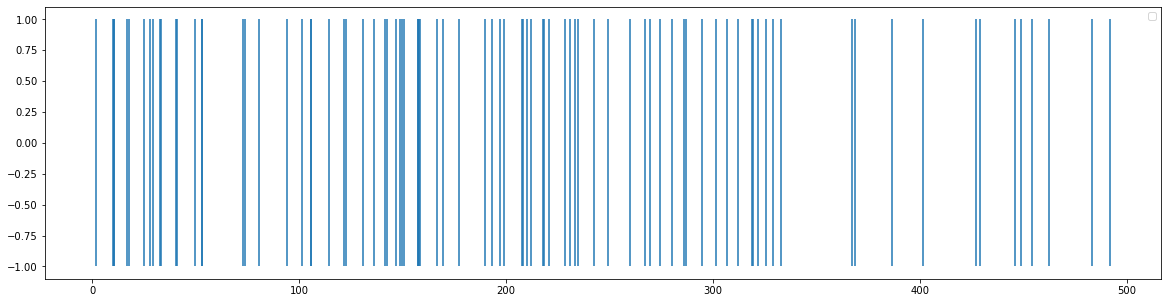

In [35]:
#a raster plot of the response to stimulus condition 1

plt.subplots(figsize = (20,5))
plt.vlines(raster, -1, 1)
plt.legend()

## Making population response matricies and heatmaps - PT1
 - The following section will describe how to make a population response matrix using the get_population_response_matrix method.
 - In order to assure that we only analyze single units, the get_population_response_matrix method must take a list of units to include while compiling the matrix.
 - Let's use the "include_units" list we made in the spike sorting metrics section.

In [36]:
include_units

array([  1,  29,  30,  34,  35,  36,  38,  39,  40,  47,  48,  52,  87,
        89,  90,  91,  92, 112, 119, 120, 122, 127, 128, 151, 156, 166,
       198, 200, 234, 262, 263, 264])

- The second thing that needs to be defined by the user is the stimulus condition(s) to include in the population response matrix.
- The previous section showed how to use the stim_conditions attribute to browse your stimulus conditions. So let's pick any one of those conditions.

In [37]:
experiment.stim_conditions

array([1, 2], dtype=uint8)

In [38]:
m = experiment.get_population_response_matrix(
    include_units, #units to include
    1, #the stimulus condition
    thresh = (0,500) #time boundary around the stimulus onsets
)
m

,2.0,30.0,31.0,35.0,36.0,37.0,39.0,40.0,41.0,48.0,...,129.0,152.0,157.0,167.0,199.0,201.0,235.0,263.0,264.0,265.0
0,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0.0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0.0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0
3,0,1,0,0,0,3,0,1,0,0,...,0,0,1,0,0,0,0.0,0,0,0
4,0,1,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,0,0,0,1,0,0,...,0,0,4,0,0,0,0.0,0,0,0
496,0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,1,0,1
497,0,1,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.0,0,0,0
498,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.0,0,0,0


- The output is a dataframe where each column is a raster array of the given unit responding to the given stimulus condition (concatenated across repeats).
- Using this dataframe, you can plot multiple rasters in a single neat looking figure.

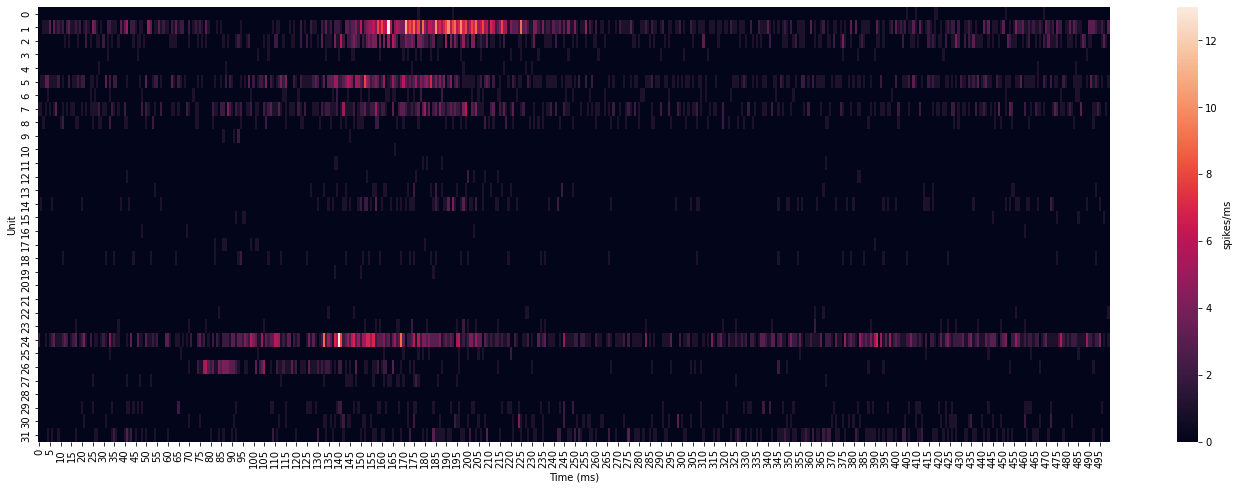

In [39]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- It is also possible to do this with all available stimulus conditions by switching the second argument to 'all'.

In [40]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all', #include all stimulus conditions
    thresh = (0,500) 
)
m

,stimulus_condition,2.0,30.0,31.0,35.0,36.0,37.0,39.0,40.0,41.0,...,129.0,152.0,157.0,167.0,199.0,201.0,235.0,263.0,264.0,265.0
0,1,0,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,0.0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0
2,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0.0,0,0,0
3,1,0,1,0,0,0,3,0,1,0,...,0,0,1,0,0,0,0.0,0,0,0
4,1,0,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,3,2,0,0,3,1,0,1,...,0,0,1,0,0,0,0.0,0,0,0
996,2,0,1,0,0,0,1,0,1,0,...,0,0,5,0,0,0,0.0,0,0,0
997,2,0,1,2,0,0,2,0,0,2,...,0,0,4,0,0,0,0.0,1,0,0
998,2,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0


- The output is similar to what was shown previously. However, now there is also a column indicating the stimulus condition.

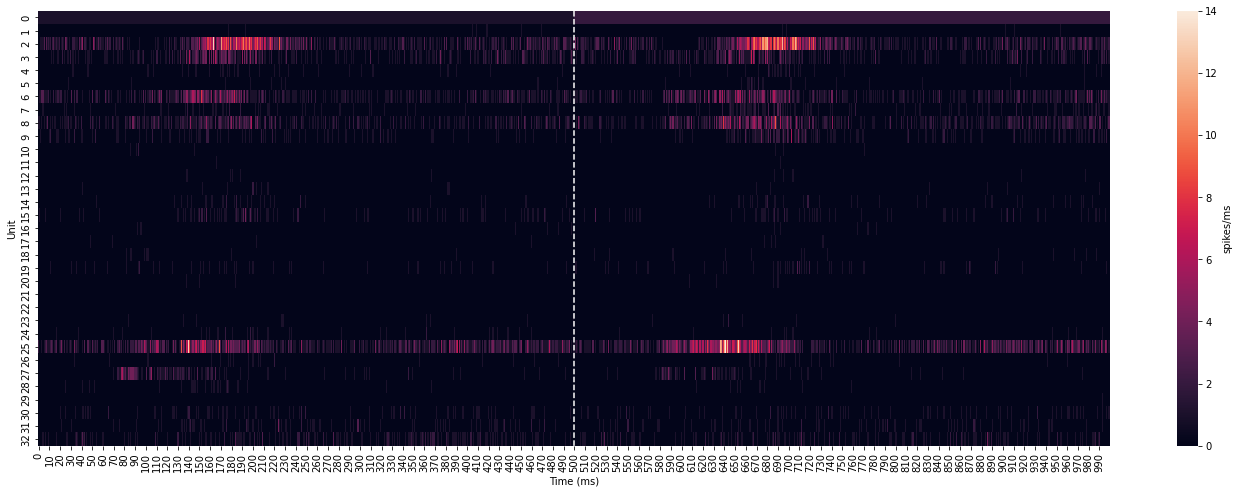

In [41]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,1000,10))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- This figure looks OK, but some of those unit's responses look pretty dim compared to the other higher frequency units.
- In order to make those faint responses pop out more, we can normalize the population response matrix within each unit.
- To do this, include the 'norm' argument when calling the get_population_response_matrix method.
    - You can set norm = any of the following: 'minmax', 'zscore', 'average'

In [42]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'minmax' #apply min/max normalization within each unit
)

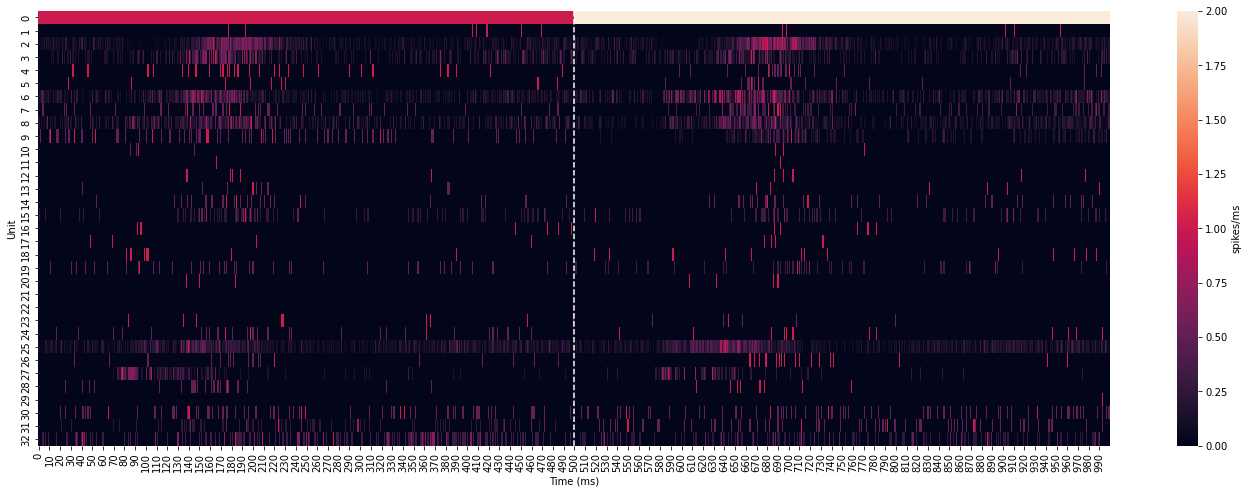

In [43]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,1000,10))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- Min/max normalization transforms each array such that the values are bounded between 0 and 1.

In [44]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'zscore' #apply zscore normalization within each unit
)

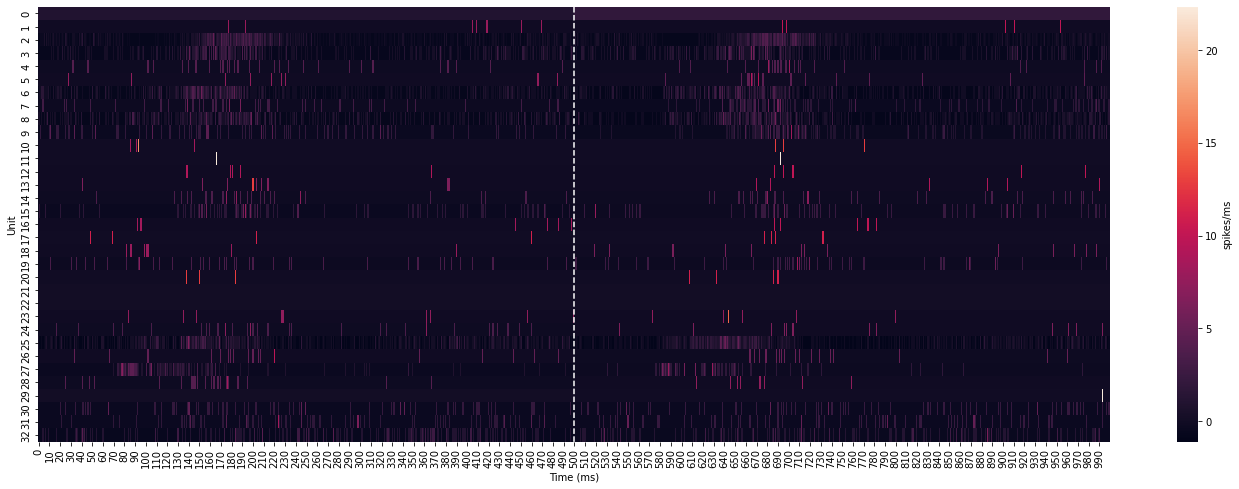

In [45]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,1000,10))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- Zscore normalization transforms each array such that each value corresponds to how many standard deviations that value falls away from the mean.

In [46]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'average' #apply average normalization within each unit
)

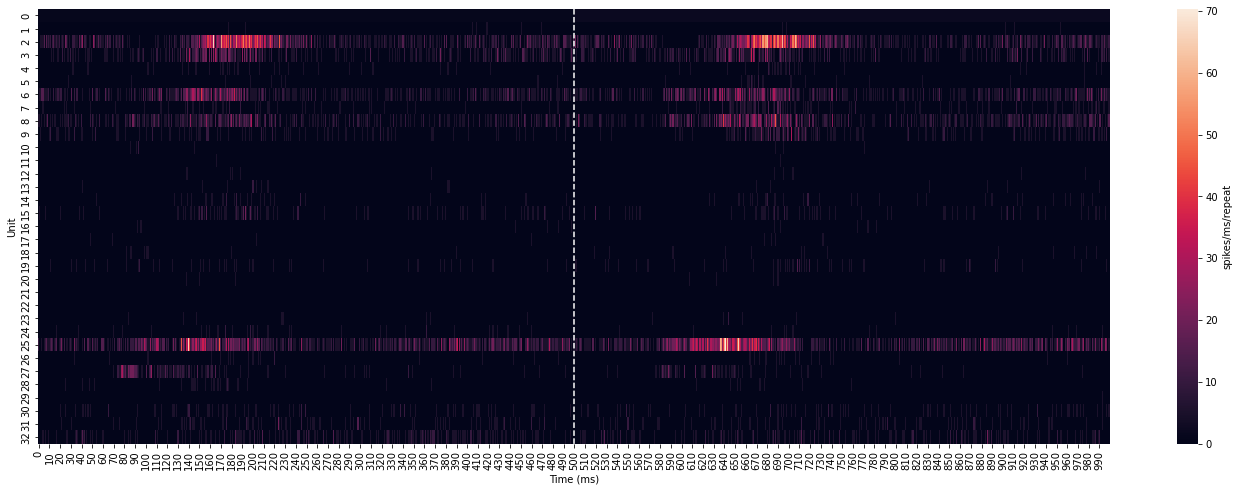

In [47]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms/repeat'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,1000,10))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- This transforms each value to the average response over all stimulus repetitions and converts it to spikes/second (rate = (spikes/stimulus repeats) * 1000). Notice that this is not visually different from no normalization. However, it is often necessary to take the average firing rate over stimulus repetitions for other types of analysis such as individual PSTH plots. With this, each row in the matrix is an individual PSTH which can be plotted as shown below:

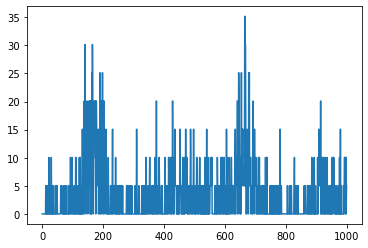

In [48]:
plt.plot(m[31])

- This PSTH is in 1ms bins. You can smooth the PSTH using convolution, which is easily implemented using numpy.

In [49]:
# define the width of your time bins by making a filter array
# an array of all 1s divided by 20 = an array of all 1/20s
filt = np.ones(20)/20

# run the np.convolve method
# first argument should be the original PSTH array
# second argument should be your filter array
# the mode = 'same' argument keeps the length of the array the same
psth_filt = np.convolve(m[31], filt, mode = 'same')

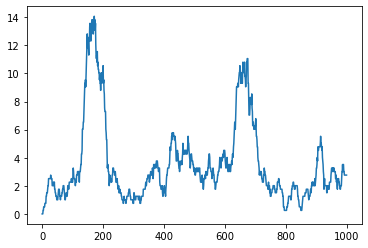

In [50]:
plt.plot(psth_filt)

## Making population response matricies and heatmaps - PT2: Stimulus conditions as columns
 - The following section describes how to generate a population response matrix where, instead of each column being associated with a cluster_id, each column is associated with a stimulus condition.
 - Notice how in the dataframe we made previously, each column is a cluster_id & there is a single column denoting the stimulus condition:

In [51]:
m.head()

,stimulus_condition,2.0,30.0,31.0,35.0,36.0,37.0,39.0,40.0,41.0,...,129.0,152.0,157.0,167.0,199.0,201.0,235.0,263.0,264.0,265.0
0,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,5.025126,0.000000,...,0.0,0.0,10.050251,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,0.0,0.000000,0.0,0.0,0.0,5.025126,0.000000,5.025126,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1,0.0,5.025126,0.0,0.0,0.0,5.025126,0.000000,0.000000,5.025126,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,0.0,5.025126,0.0,0.0,0.0,15.075377,0.000000,5.025126,0.000000,...,0.0,0.0,5.025126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1,0.0,5.025126,0.0,0.0,0.0,15.075377,5.025126,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.025126


 - For certain analyses, it is necessary to swap these. The get_population_response_matrix method enables you to do this using by including the 'columns' argument when calling the method. 
 - To better demonstrate how this works, we will make a population response matrix from an experiment in which 180 natural image stimuli were shown to the animal.

In [52]:
#you can replace these variables with your own files
spike_file =  '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK2/AE_M001_Section_1_BLK2_firings.mat'
stim_file =  '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK2/AE_M001_Section_1_BLK2_stimulusData.mat'
metrics_file = '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_metrics_isolation.json'

experiment = load_experiment(spike_file, stim_file)
metrics = experiment.get_spike_sorting_metrics(metrics_file)
single_units = metrics.loc[ 

    (metrics.isolation > 0.96) 
    & (metrics.noise_overlap < 0.07)
].reset_index()

include_units = single_units['index'].values

In [53]:
m_sc = experiment.get_population_response_matrix(include_units, 'all', thresh = (-200,300), norm = 'average', columns = 'stimulus_condition')

In [54]:
m_sc

,cluster_id,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
31,265.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
31,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The output is a dataframe where each numbered column is the stimulus and the cluster_id column is a dim0 sized array of the cluster ids.
- With this, you can use pd.loc to restrict the dataframe to a particular cluster.

In [55]:
unit = m_sc.loc[m_sc.cluster_id==39] #picking a cluster to plot the responses

- Now you can make a heatmap where each row is the trial averaged psth of the cluster at each stimulus condition.

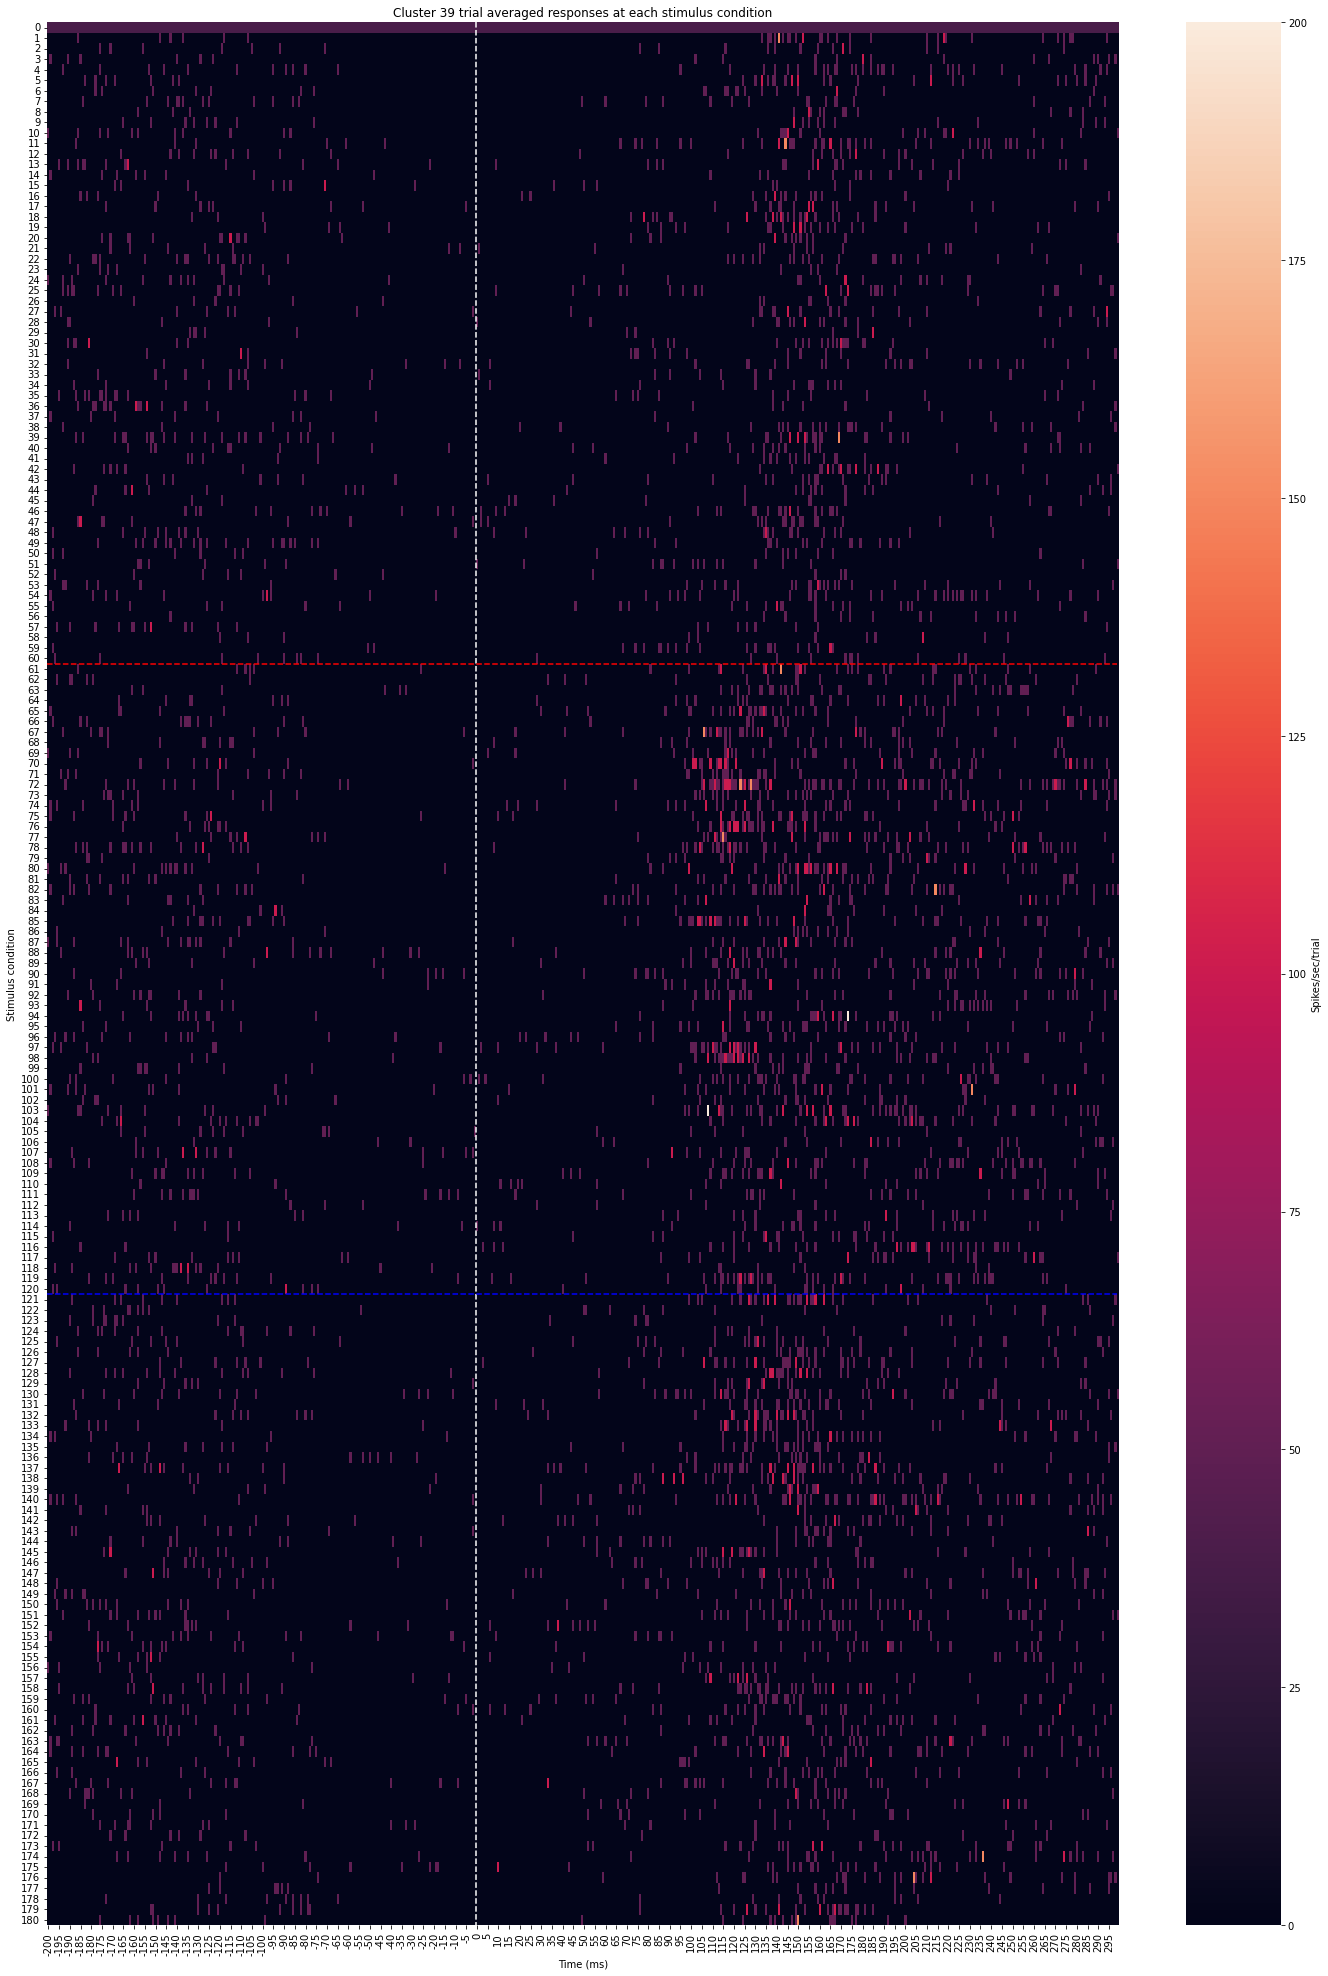

In [56]:
fig, ax = plt.subplots(figsize = (24,35))
ax = sns.heatmap(unit.values.T, cbar_kws = {'label': 'Spikes/sec/trial'})
ax.set_xticklabels(np.arange(-200,300,5))
ax.plot([200]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.plot(np.arange(500), [61]*500, linestyle = '--', color = 'red')
ax.plot(np.arange(500), [121]*500, linestyle = '--', color = 'blue')
ax.set_title(f"Cluster 39 trial averaged responses at each stimulus condition")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Stimulus condition")
plt.show()